**Problem Statement:**

As a student at CU Boulder searching for a suitable 1-bedroom apartment in and around Boulder, you have opted to explore available rental properties on Craigslist. To streamline your process of saving and filtering preferred properties, you've chosen to leverage web scraping to extract and organize the necessary data. This approach eliminates the tedious task of manually copying information from the website to Excel.

[Craigslist](https://boulder.craigslist.org/) is a privately held American company known for its classified advertisements website. The platform includes sections dedicated to jobs, housing, items for sale, services, community activities, gigs, résumés, and discussion forums.

Your specific home requirements are as follows:
1. Type: Apartment
2. Monthly Rent: Under $1500
3. Bedrooms: 1


After applying these filters on the Craigslist website, you discover 97 properties that meet your criteria as of 24 Jan 2024. In order to facilitate further analysis, you decide to web scrape details for these 97 apartments.

The information to be extracted includes:
1. Title
2. Price
3. Location
4. Link to the Property

Upon inspecting the HTML structure of the website [url](https://boulder.craigslist.org/search/apa?housing_type=1&max_bedrooms=1&max_price=1500&min_bedrooms=1#search=1~gallery~0~0), it is observed that the relevant details are stored as an ordered list, as illustrated in the accompanying picture.

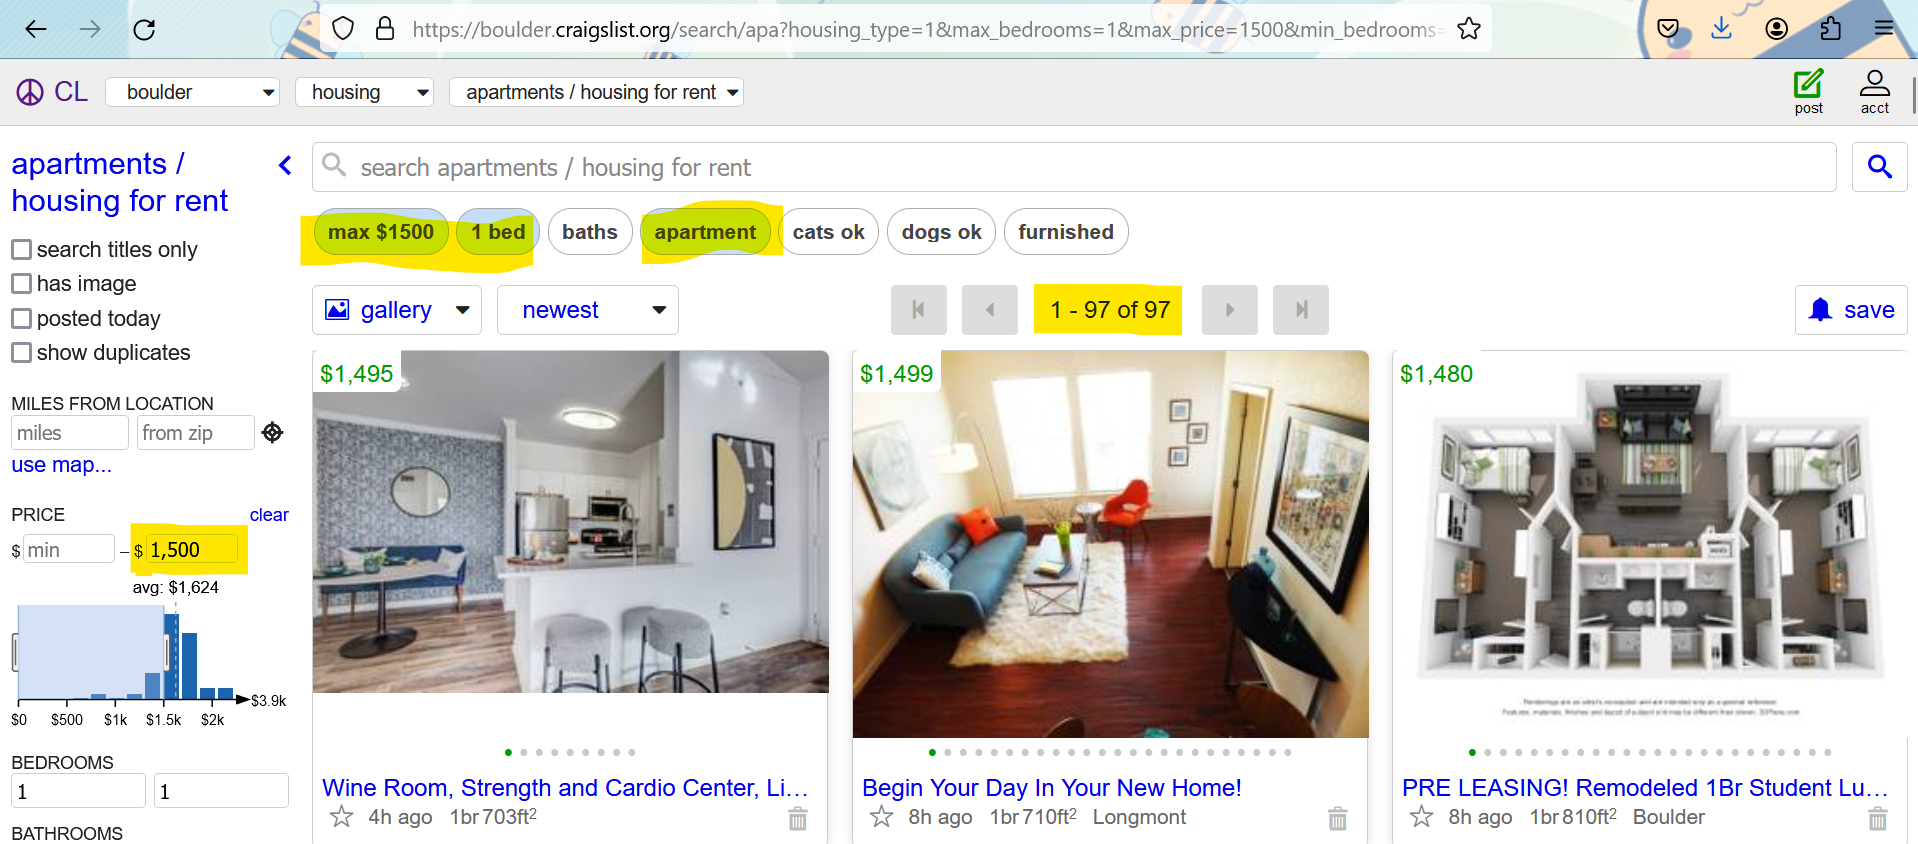

Upon inspecting the HTML structure of the website, it is observed that the relevant details are stored as an ordered list, as illustrated in the accompanying picture.

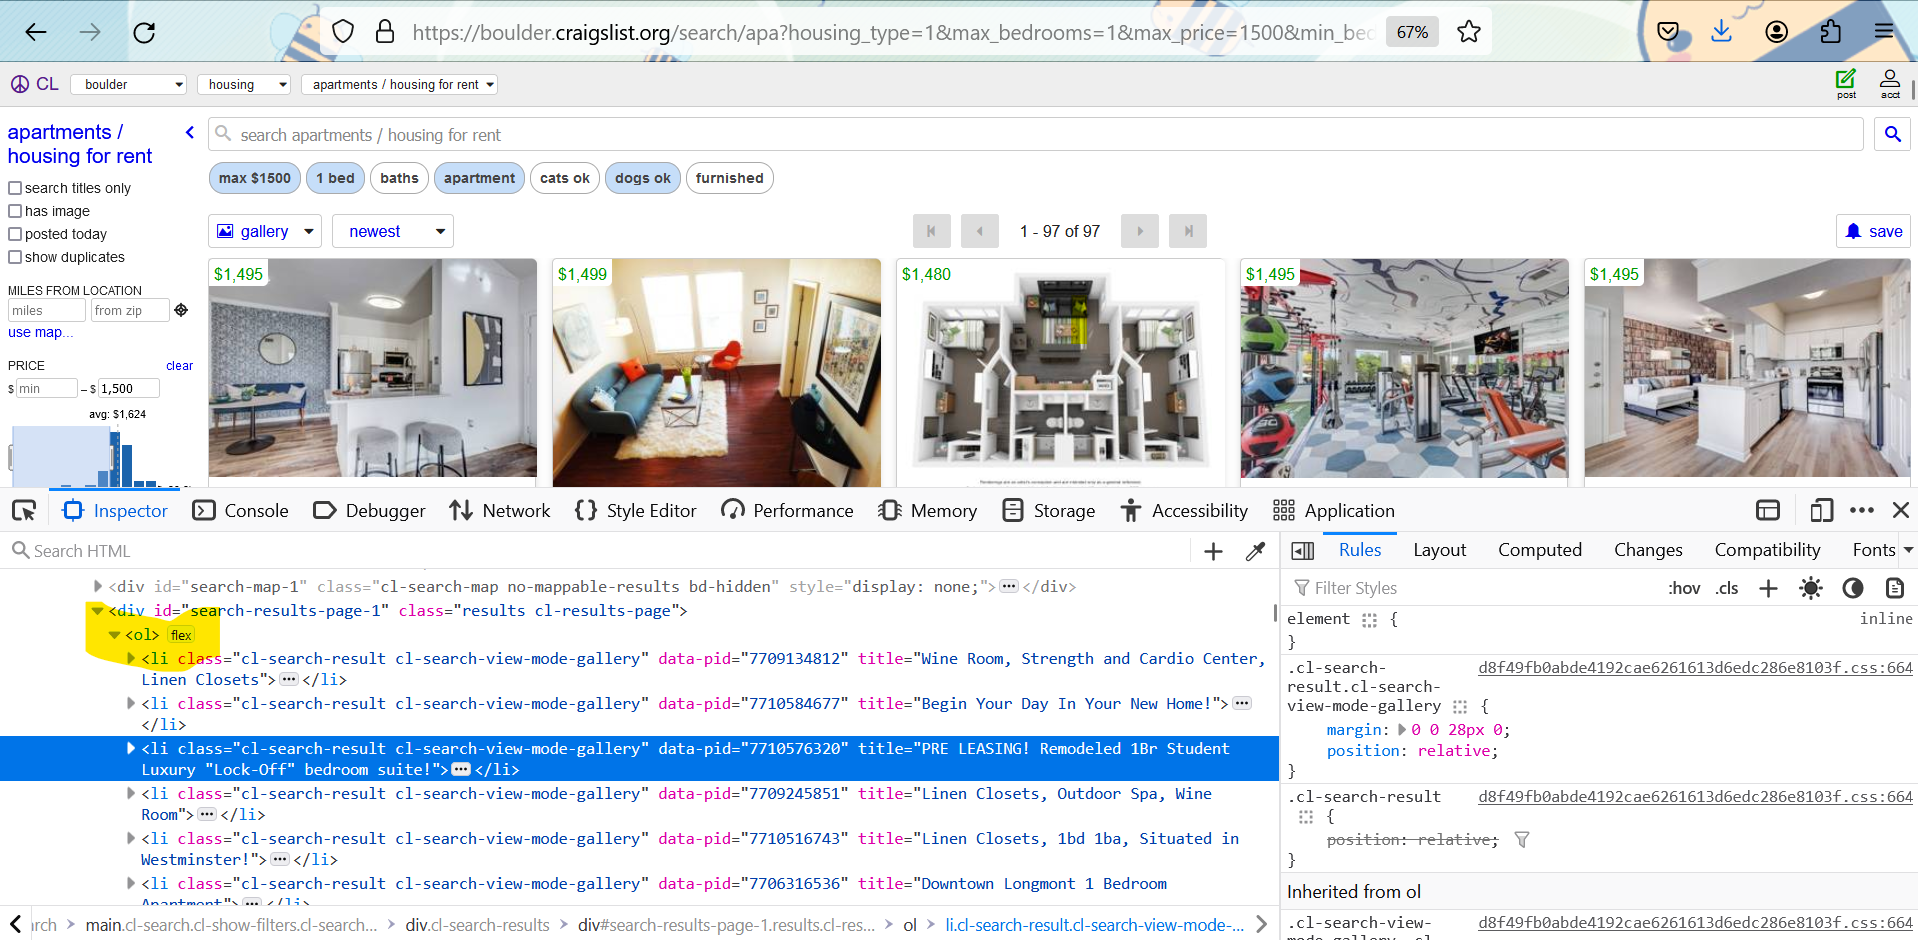

Below is a code that can be used for webscrapping

In [ ]:
# importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# url of the website to scrap info from
url = "https://boulder.craigslist.org/search/apa?housing_type=1&max_bedrooms=1&max_price=1500&min_bedrooms=1#search=1~gallery~0~0"

# send a GET request to the URL and get the HTML content
html_string = requests.get(url).content
# parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_string, 'html.parser')

# find all ordered lists on the page
content = soup.find_all("ol")

# lists to store scraped data
links = []
price = []
location = []
title = []

# iterate through each ordered list
for list_ in content:
  # iterate through each 'a' tag within the ordered list
  for ad in list_.find_all('a'):
    # get the 'href' attribute from the 'a' tag
    link = ad.get('href', '')
    links.append(link)

# find all list items with class 'cl-static-search-result'
list_items = soup.find_all('li', class_='cl-static-search-result')

# iterate through each list item and extract title, price, and location
for li in list_items:
    title.append(li.get('title'))
    price.append(li.find('div', class_='price').text if li.find('div', class_='price') else None)
    location.append(li.find('div', class_='location').text if li.find('div', class_='location') else None)

# creating a dataframe
columns = {'Title': title, 'Price': price,
           'Location': location, 'Link': links[6:]} # excluding first 6 irrelevant links
properties = pd.DataFrame(columns)

# data cleaning
properties['Location'] = properties['Location'].str.strip() # remove leading and trailing spaces

print(properties.head())

# saving the dataframe as csv file
properties.to_csv("properties.csv", index=False)

                                               Title   Price  Location  \
0              Cozy 1 BR Short Term Rental W/Parking  $1,165      None   
1  Wine Room, Strength and Cardio Center, Linen C...  $1,495      None   
2                   Begin Your Day In Your New Home!  $1,499  Longmont   
3  PRE LEASING! Remodeled 1Br Student Luxury "Loc...  $1,480   Boulder   
4              Linen Closets, Outdoor Spa, Wine Room  $1,495      None   

                                                Link  
0  https://boulder.craigslist.org/apa/d/boulder-c...  
1  https://boulder.craigslist.org/apa/d/westminst...  
2  https://boulder.craigslist.org/apa/d/longmont-...  
3  https://boulder.craigslist.org/apa/d/boulder-p...  
4  https://boulder.craigslist.org/apa/d/westminst...  
